## ACTD 2025 - 10

### Clases 11-12: Introducción a redes neuronales

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida

Empecemos importando numpy y pandas

In [1]:
import numpy as np
import pandas as pd

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [4]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [5]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(392, 8)

Codifiquemos la variable categórica Origin

In [8]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [9]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [10]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [11]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [12]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [13]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Separamos los datos en entrenamiento y prueba

In [14]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [15]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [16]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable numérica

In [17]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968,0.171975,0.219745,0.608280
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110,0.377961,0.414735,0.488914
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [18]:
import seaborn as sns

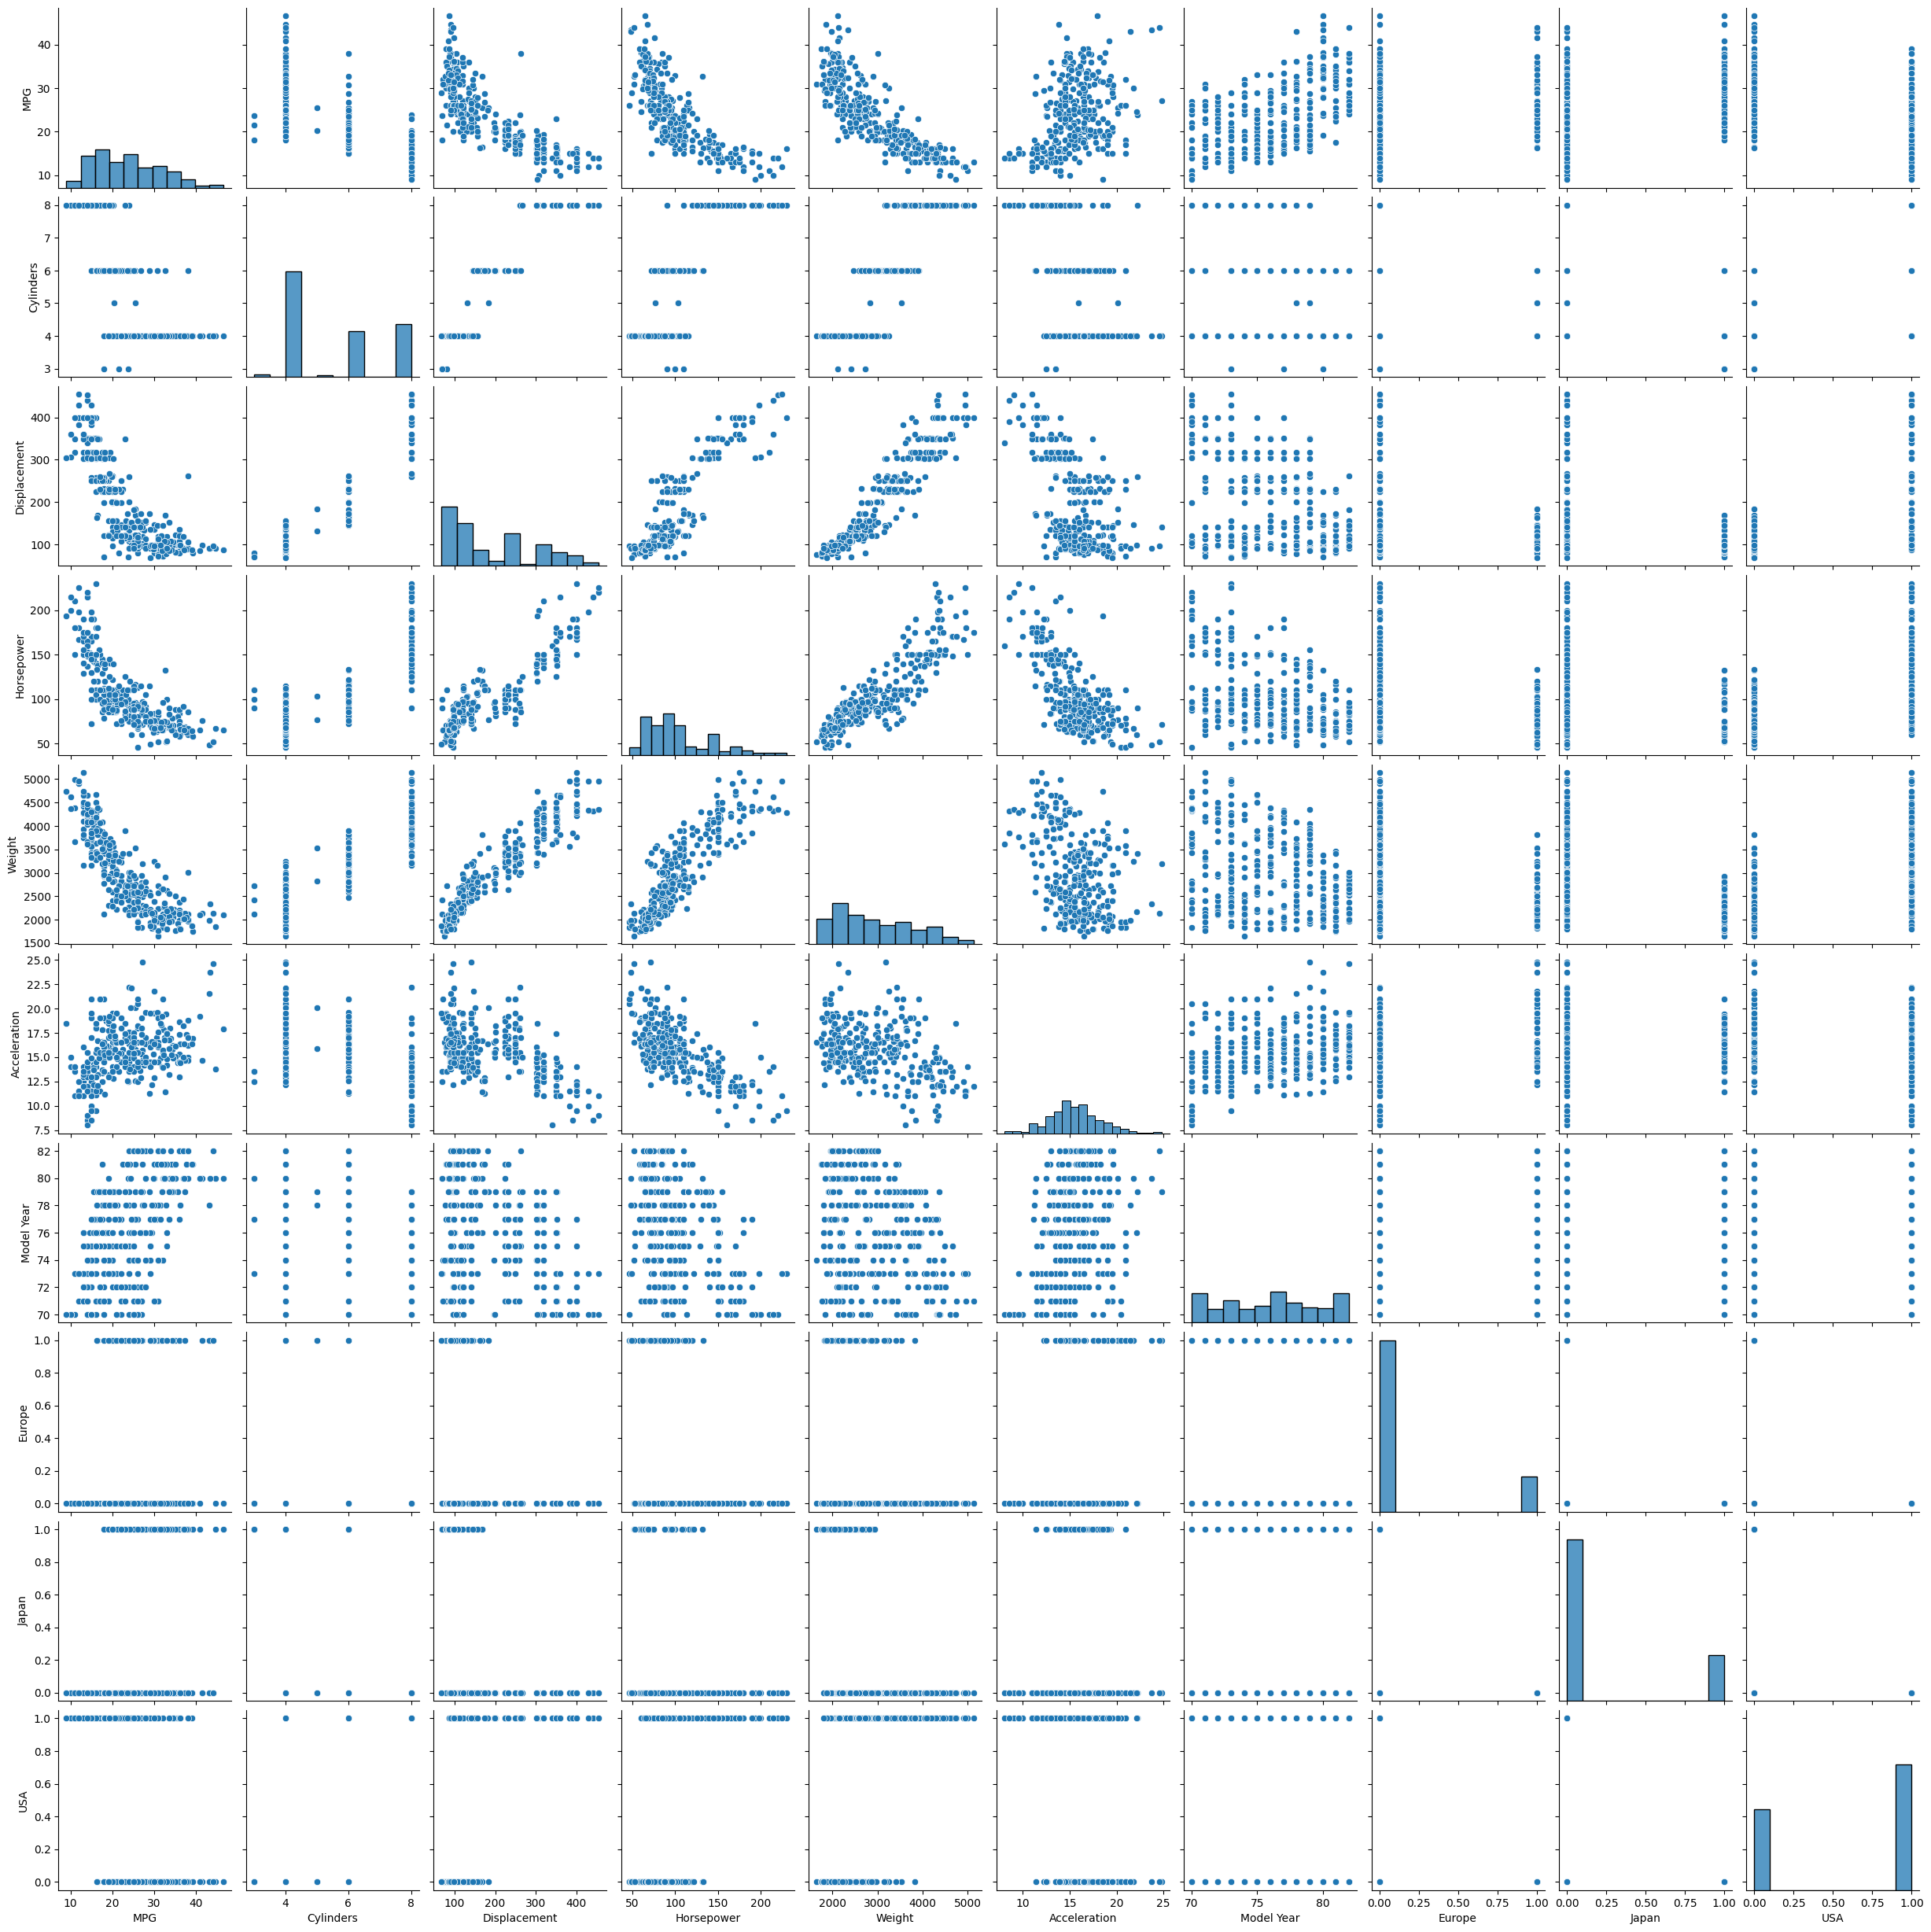

In [19]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [20]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777230,-0.807032,-0.775493,-0.832793,0.389422,0.596816,0.249298,0.455161,-0.578826
Cylinders,-0.777230,1.000000,0.950858,0.849237,0.901259,-0.488703,-0.330668,-0.352708,-0.416286,0.625791
Displacement,-0.807032,0.950858,1.000000,0.893640,0.941913,-0.523473,-0.364236,-0.372541,-0.455127,0.674072
Horsepower,-0.775493,0.849237,0.893640,1.000000,0.875157,-0.672989,-0.414065,-0.291224,-0.327337,0.502808
Weight,-0.832793,0.901259,0.941913,0.875157,1.000000,-0.402870,-0.318231,-0.304870,-0.454284,0.621043
Acceleration,0.389422,-0.488703,-0.523473,-0.672989,-0.402870,1.000000,0.258013,0.195310,0.110850,-0.245018
Model Year,0.596816,-0.330668,-0.364236,-0.414065,-0.318231,0.258013,1.000000,-0.062402,0.237930,-0.153590
Europe,0.249298,-0.352708,-0.372541,-0.291224,-0.304870,0.195310,-0.062402,1.000000,-0.241853,-0.567903
Japan,0.455161,-0.416286,-0.455127,-0.327337,-0.454284,0.110850,0.237930,-0.241853,1.000000,-0.661311
USA,-0.578826,0.625791,0.674072,0.502808,0.621043,-0.245018,-0.153590,-0.567903,-0.661311,1.000000


<Axes: >

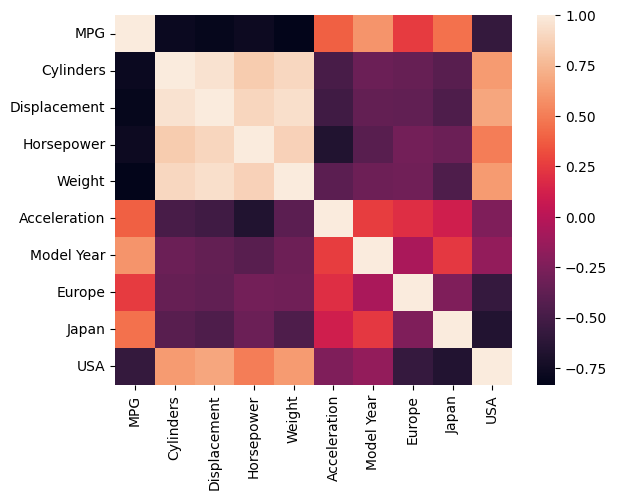

In [21]:
sns.heatmap(train.corr())

Seleccionamos ahora las características y las etiquetas (MPG)

In [22]:
train_X = train.copy()
test_X = test.copy()

In [23]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [24]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [25]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [26]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int64
Japan             int64
USA               int64
dtype: object

Construyamos los modelos usando tensorflow

In [29]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [30]:
tf.__version__

'2.18.0'

Capa de normalización

In [31]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [32]:
norm = tf.keras.layers.Normalization()

In [33]:
norm.adapt(np.array(train_X))

In [34]:
norm.mean.numpy()

array([[5.4554138e+00, 1.9256210e+02, 1.0376752e+02, 2.9593120e+03,
        1.5518472e+01, 7.5964966e+01, 1.7197452e-01, 2.1974522e-01,
        6.0828024e-01]], dtype=float32)

In [35]:
norm.variance.numpy()

array([[2.8531077e+00, 1.0719739e+04, 1.4487772e+03, 7.3190656e+05,
        7.2942448e+00, 1.3441448e+01, 1.4239928e-01, 1.7145726e-01,
        2.3827539e-01]], dtype=float32)

In [36]:
np.sqrt(norm.variance.numpy())

array([[1.6891145e+00, 1.0353617e+02, 3.8062805e+01, 8.5551538e+02,
        2.7007859e+00, 3.6662581e+00, 3.7735829e-01, 4.1407397e-01,
        4.8813459e-01]], dtype=float32)

In [37]:
train_X[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1


In [38]:
norm(train_X[:1]).numpy()

array([[ 0.32240927,  0.05252171, -0.23034343,  0.166786  ,  0.36342323,
        -0.5359595 , -0.45573273, -0.5306907 ,  0.8024831 ]],
      dtype=float32)

## Modelos con una variable de entrada

In [39]:
hpower = np.array(train_X['Horsepower'])

In [40]:
hpower_norm = tf.keras.layers.Normalization(input_shape=[1,], axis=None)

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
hpower_norm.adapt(hpower)

### Modelo lineal

In [42]:
h_model = tf.keras.Sequential([
    hpower_norm,
    tf.keras.layers.Dense(units=1)
])

In [43]:
h_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [44]:
h_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [45]:
%%time
history = h_model.fit(
    train_X['Horsepower'],
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 23.3196 - val_loss: 21.7130
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.0933 - val_loss: 20.9356
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.7917 - val_loss: 20.1612
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 21.2302 - val_loss: 19.3871
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 20.8168 - val_loss: 18.6146
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 19.2751 - val_loss: 17.8243
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 18.7297 - val_loss: 17.0480
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 17.7397 - val_loss: 16.2606
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 17.9508 - val_loss: 15.4886
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 16.3952 - val_loss: 14.7004
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 16.0197 - val_loss: 13.9334
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step -

In [46]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [47]:
hist.head()

,loss,val_loss,epoch
0,23.507784,21.712997,0
1,22.701572,20.935583,1
2,21.898012,20.161190,2
3,21.091692,19.387075,3
4,20.291220,18.614584,4


In [48]:
import matplotlib.pyplot as plt

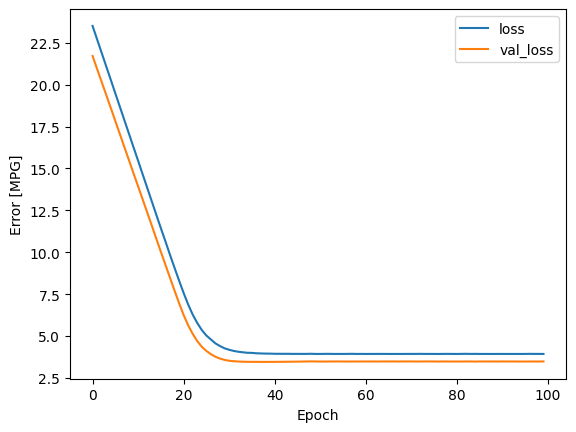

In [49]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [50]:
test_res = {}
test_res['h_model'] = h_model.evaluate(
    test_X['Horsepower'],
    test_y, verbose=0)

In [51]:
test_res

{'h_model': 3.6810076236724854}

In [52]:
df['Horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

In [53]:
x = tf.linspace(0.0, 250, 251) #start, stop, num
y = h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


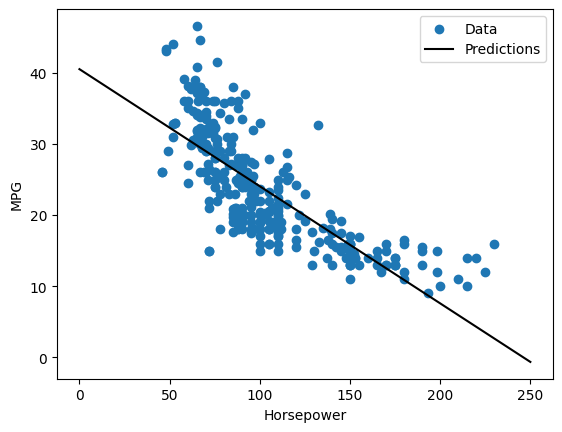

In [54]:
plt.scatter(train_X['Horsepower'], train_y, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

### Modelo multicapa con activación ReLU

In [55]:
dnn_h_model = tf.keras.Sequential([
      hpower_norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [56]:
dnn_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [57]:
dnn_h_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324 (1.27 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 3 (16.00 B)

In [58]:
%%time
history = dnn_h_model.fit(
    train_X['Horsepower'],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 23.8254 - val_loss: 22.5588
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.9826 - val_loss: 22.4478
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.5375 - val_loss: 22.3454
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8400 - val_loss: 22.2496
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.5054 - val_loss: 22.1522
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.4090 - val_loss: 22.0516
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.5291 - val_loss: 21.9462
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.4710 - val_loss: 21.8311
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.9527 - val_loss: 21.7020
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.5260 - val_loss: 21.5639
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.4501 - val_loss: 21.4170
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

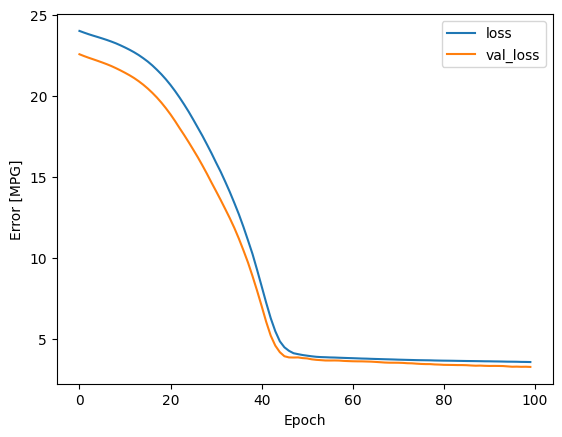

In [59]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [60]:
x = tf.linspace(0.0, 250, 251)
y = dnn_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


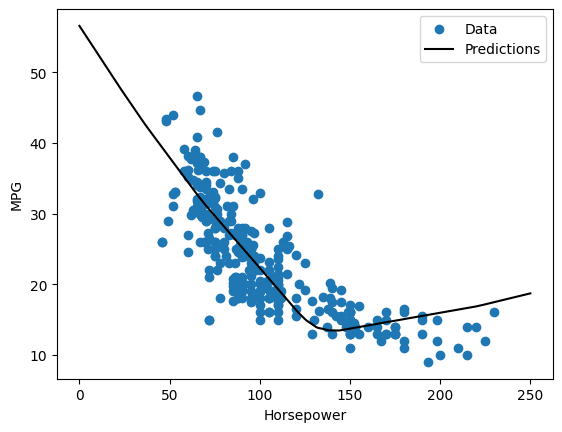

In [61]:
plt.scatter(train_X['Horsepower'], train_y, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [62]:
test_res['dnn_h_model'] = dnn_h_model.evaluate(
    test_X['Horsepower'], test_y,
    verbose=0)

In [63]:
test_res

{'h_model': 3.6810076236724854, 'dnn_h_model': 3.2015514373779297}

## Modelo con múltiples variables de entrada

In [64]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [65]:
linear_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (314, 9)               │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [66]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [67]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 22.9292 - val_loss: 21.3420
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.1392 - val_loss: 20.7860
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.1374 - val_loss: 20.1690
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.1741 - val_loss: 19.4654
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.3928 - val_loss: 18.8475
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.8161 - val_loss: 18.1914
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.0111 - val_loss: 17.5946
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.5187 - val_loss: 16.9118
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.0785 - val_loss: 16.2705
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.3063 - val_loss: 15.6718
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.6358 - val_loss: 15.0247
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

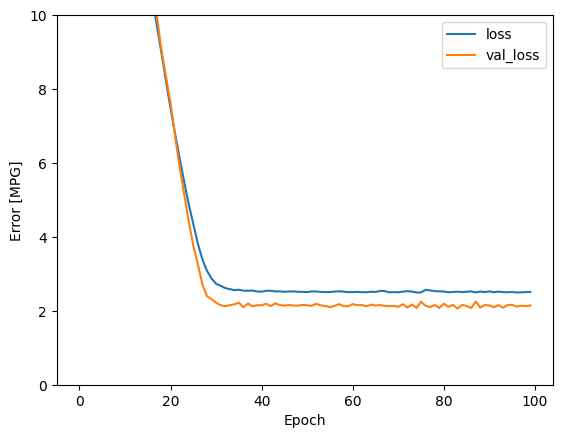

In [68]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [69]:
test_res['linear_model'] = linear_model.evaluate(
    test_X, test_y, verbose=0)

In [70]:
test_res

{'h_model': 3.6810076236724854,
 'dnn_h_model': 3.2015514373779297,
 'linear_model': 2.597193479537964}

In [71]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [72]:
dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [73]:
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [74]:
%%time
history = dnn_model.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 23.7770 - val_loss: 22.5042
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.5978 - val_loss: 21.9681
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.1961 - val_loss: 21.4111
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.2748 - val_loss: 20.7392
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.5481 - val_loss: 19.9007
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.5274 - val_loss: 18.7975
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.4564 - val_loss: 17.3212
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.6431 - val_loss: 15.6045
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.9242 - val_loss: 13.8850
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.8289 - val_loss: 12.4078
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.4351 - val_loss: 10.6983
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

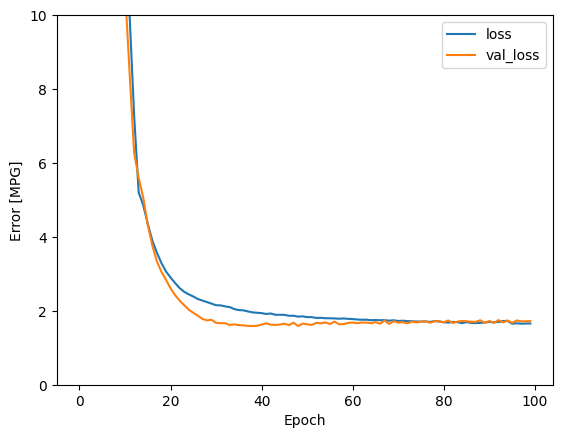

In [75]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [76]:
test_res['dnn_model'] = dnn_model.evaluate(test_X, test_y, verbose=0)

In [77]:
test_res

{'h_model': 3.6810076236724854,
 'dnn_h_model': 3.2015514373779297,
 'linear_model': 2.597193479537964,
 'dnn_model': 2.090348958969116}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


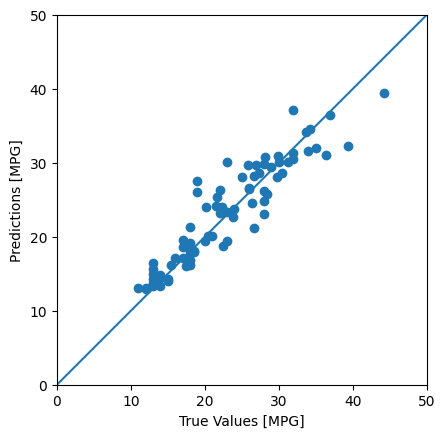

In [78]:
test_pred = dnn_model.predict(test_X).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)